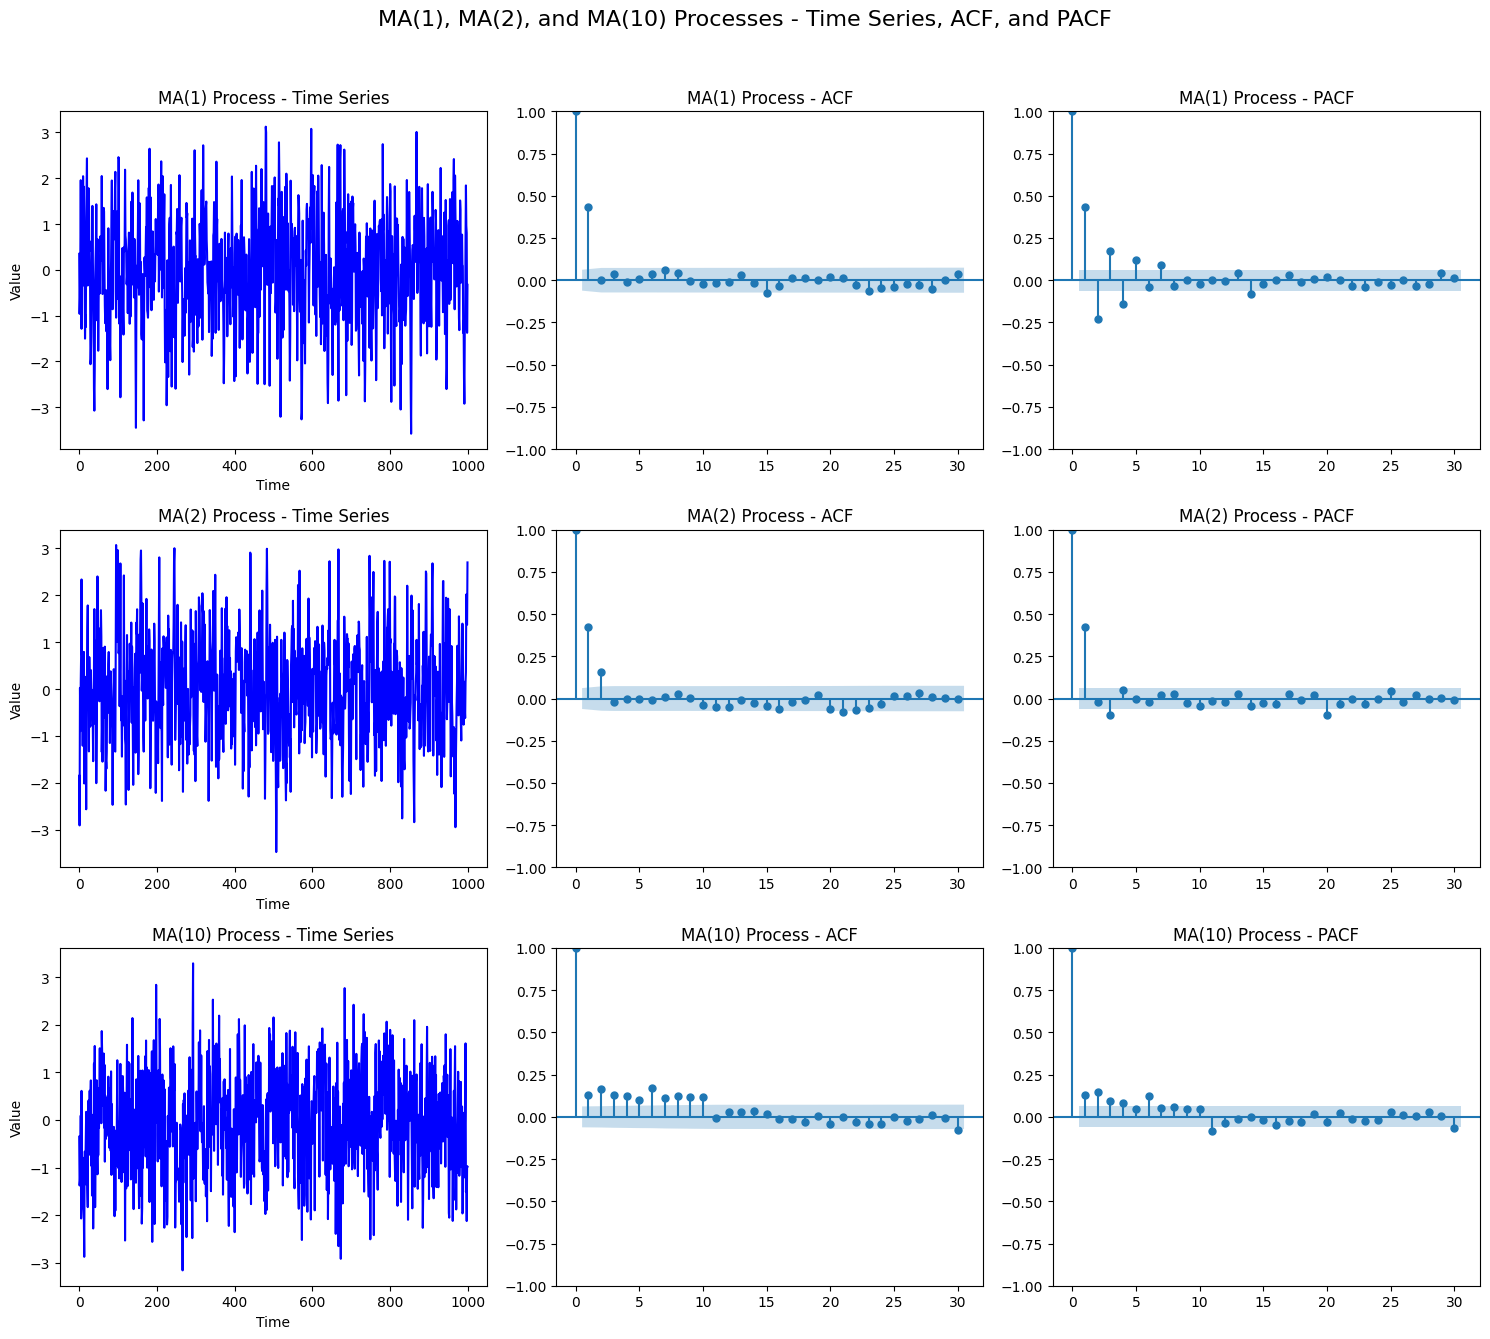

In [4]:
# Define MA parameters for MA(1), MA(2), and a high-order MA model to mimic asymptotic behavior (MA(10))
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
#pip install statsmodels numpy matplotlib


ma_params_list = {
    'MA(1)': [1, 0.7],          # MA(1) with coefficient 0.7
    'MA(2)': [1, 0.5, 0.3],     # MA(2) with coefficients 0.5 and 0.3
    'MA(10)': [1] + [0.1] * 10  # MA(10) with smaller coefficients to show asymptotic-like behavior
}

n = 1000  # Number of observations

# Plot for MA(1), MA(2), and MA(10) showing time series, ACF, and PACF
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("MA(1), MA(2), and MA(10) Processes - Time Series, ACF, and PACF", fontsize=16, y=0.92)

for i, (model, params) in enumerate(ma_params_list.items()):
    # Generate data for the MA process
    ma_process = ArmaProcess([1], params)
    ma_data = ma_process.generate_sample(nsample=n)

    # Plot time series
    axs[i, 0].plot(ma_data, color='blue')
    axs[i, 0].set_title(f"{model} Process - Time Series")
    axs[i, 0].set_xlabel("Time")
    axs[i, 0].set_ylabel("Value")

    # Plot ACF
    sm.graphics.tsa.plot_acf(ma_data, lags=30, ax=axs[i, 1])
    axs[i, 1].set_title(f"{model} Process - ACF")

    # Plot PACF
    sm.graphics.tsa.plot_pacf(ma_data, lags=30, ax=axs[i, 2])
    axs[i, 2].set_title(f"{model} Process - PACF")

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()


Here are the time series, ACF, and PACF plots for MA(1), MA(2), and MA(10) models, illustrating how these differ across increasing orders and mimic asymptotic behavior for the Moving Average (MA) process:

**MA(1)**:
Time Series: Shows random fluctuations influenced by a single lagged error term.
ACF: Cuts off sharply after lag 1, as expected in an MA(1) process, indicating no further lagged dependencies.
PACF: Decays gradually, often exponentially, since the model only directly incorporates the first lagged error term.

**MA(2)**:
Time Series: Displays more complexity than MA(1) due to influences from two lagged error terms.
ACF: Cuts off after lag 2, a clear characteristic of an MA(2) model.
PACF: Shows a slower decay, as indirect dependencies emerge with each lag.

**MA(10)**:
Time Series: Shows increased volatility, influenced by many lagged error terms.
ACF: Displays a gradual, extended decay, indicating dependencies from multiple past errors.
PACF: Cuts off after lag 10, consistent with the high-order MA structure.
For MA(𝑞) models, the ACF cutoff after 𝑞 lags is the key identifying feature, as it indicates the order 𝑞 directly. The PACF, on the other hand, gradually decays, reflecting the indirect dependencies extending beyond the immediate lags.